In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df['Class'].value_counts(normalize = True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [5]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

df_new = pd.concat([fraud, normal.sample(492)])

df_new['Class'].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

In [6]:
X_small = df_new.drop(['Class'], axis=1)
y_small = df_new['Class']

X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, test_size=0.2)
X_train_small.shape, X_test_small.shape, y_train_small.shape, y_test_small.shape

((787, 30), (197, 30), (787,), (197,))

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [8]:
model = RandomForestClassifier(class_weight='balanced')

model.fit(X_train, y_train)

qwe_large = accuracy_score(y_test, model.predict(X_test))
qwe_small = accuracy_score(y_test_small, model.predict(X_test_small))

print(f"large: {qwe_large:.5f}\nsmall: {qwe_small:.5f}")

large: 0.99970
small: 0.99492


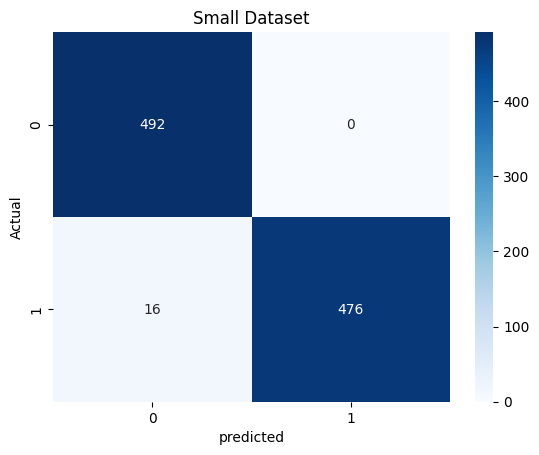

In [9]:
y_pred = model.predict(X_small)

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm=confusion_matrix(y_small, y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Small Dataset')
plt.xlabel('predicted')
plt.ylabel('Actual');

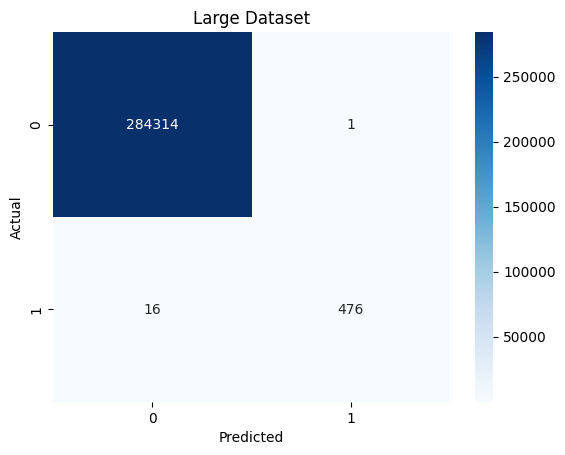

In [10]:
y_pred = model.predict(X)

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm=confusion_matrix(y, y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Large Dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [11]:
cm

array([[284314,      1],
       [    16,    476]])

In [ ]:
print(f"Доля пропущенных мошеннических транзакций: {25/492*100:.3f}%")
print(f"Количество ложных срабатываний: {5/len(df) * 100:.3f}%")
print(f"Суммарное количество выявленных мошеннических транзакций: {471}")
print(f"Суммарное количество выявленных мошеннических транзакций относительно общего их числа: {471 / 492 *100 :.2f}%")
saved_money = df[(df['Class'] == y_pred) & (df['Class'] == 1)]['Amount'].sum()

print(f"Сумма средств, сохранённых благодаря выявлению мошеннических транзакций: {saved_money/2*365*84.4:.2f} руб. в год")


Доля пропущенных мошеннических транзакций: 5.081%
Количество ложных срабатываний: 0.002%
Суммарное количество выявленных мошеннических транзакций: 471
Суммарное количество выявленных мошеннических транзакций относительно общего их числа: 95.73%
Сумма средств, сохранённых благодаря выявлению мошеннических транзакций: 881745659.18 руб. в год


In [13]:
from timeit import default_timer

start = default_timer()

prob = model.predict(X.loc[[1, 2]])

end = default_timer()

print(f'Время ответа: {(end - start) / 2 * 1000 :.3f} мс')

Время ответа: 3.972 мс
